In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from sklearn.metrics import mean_squared_error
from random import random, seed
import sys
sys.path.append("../")
import functions as f
plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.available
import seaborn as sns
import load_data as ld
import classes as cl

# Load simple data
X, y, x, a_true = ld.load_simple_data(100, 0.1)

# Initial beta
beta_init = np.random.randn(X.shape[1])
print(X.shape[1])
print(a_true)

betaOLS = f.beta_OLS(X, y)
betaRidge = f.beta_Ridge(X, y, 0.5)
print(beta_init)
print(betaOLS)
print(betaRidge)

3
[0.88114956 0.82005649 0.73665888]
[-1.22541231  1.12483019 -1.18774191]
[0.88378481 0.82957288 0.72425269]
[0.87919261 0.82554568 0.72457299]


In [2]:
#Task 1) plain gradient descent with and without ridge
#OLS)
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=100, optimizer='gd', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
#Ridge)
rgd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=100, optimizer='gd', gradient_method='analytical', lambda_param=0.1, cost_function='ridge')
optimized_rgd_beta = rgd.optimize()
print(optimized_rgd_beta)
yrgd = optimized_rgd_beta[0] + optimized_rgd_beta[1]*x + optimized_rgd_beta[2]*x**2
print(mean_squared_error(y, yrgd))

[0.26089698 0.95388038 0.89253865]
0.2731105568226007
[0.27542128 0.89161104 0.86313741]
0.26411806936456456


In [3]:
#task 2) momentum gradient descent with and without ridge and comparison to plain gradient descent
#OLS)
mgd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=100, optimizer='gd', gradient_method='analytical', lambda_param=0.1, momentum = 0.9)
optimized_mgd_beta = mgd.optimize()
print(optimized_mgd_beta)
ymgd = optimized_mgd_beta[0] + optimized_mgd_beta[1]*x + optimized_mgd_beta[2]*x**2
print(mean_squared_error(y, ymgd))
#Ridge)
rmgd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=100, optimizer='gd', gradient_method='analytical', lambda_param=0.1, cost_function='ridge', momentum = 0.9)
optimized_rmgd_beta = rmgd.optimize()
print(optimized_rmgd_beta)
yrmgd = optimized_rmgd_beta[0] + optimized_rmgd_beta[1]*x + optimized_rmgd_beta[2]*x**2
print(mean_squared_error(y, yrmgd))

#comparing with the above loss values, we clearly see faster convergence

[0.8888034  0.82885954 0.72834302]
0.011273641042086209
[0.80079571 0.75458433 0.72936325]
0.023232293923448822


In [4]:
#task 3) repeat for stochastic gradient descent and dicuss results with respect to batch size, number of epochs etc
#without momentum
#OLS)
gd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='sgd', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
#Ridge)
rgd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='sgd', gradient_method='analytical', lambda_param=0.1, cost_function='ridge')
optimized_rgd_beta = rgd.optimize()
print(optimized_rgd_beta)
yrgd = optimized_rgd_beta[0] + optimized_rgd_beta[1]*x + optimized_rgd_beta[2]*x**2
print(mean_squared_error(y, yrgd))
#with momentum
#OLS)
mgd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='sgd', gradient_method='analytical', lambda_param=0.1, momentum = 0.9)
optimized_mgd_beta = mgd.optimize()
print(optimized_mgd_beta)
ymgd = optimized_mgd_beta[0] + optimized_mgd_beta[1]*x + optimized_mgd_beta[2]*x**2
print(mean_squared_error(y, ymgd))
#Ridge)
rmgd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='sgd', gradient_method='analytical', lambda_param=0.1, cost_function='ridge', momentum = 0.9)
optimized_rmgd_beta = rmgd.optimize()
print(optimized_rmgd_beta)
yrmgd = optimized_rmgd_beta[0] + optimized_rmgd_beta[1]*x + optimized_rmgd_beta[2]*x**2
print(mean_squared_error(y, yrmgd))

#this clearly converges faster than standard gradient descent (here we have batch sizes 1/10th the size, and 10x the epochs,
#so the same amount of computations.

#testing various batch sizes and number of epochs using OLS without momentum
batch_sizes = [1, 5, 20]
epochsls = [20, 100, 1000]
cost_history = []
for batch_size in batch_sizes:
    for epochs in epochsls:
        gd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=epochs, optimizer='sgd', gradient_method='analytical', lambda_param=0.1, batch_size=batch_size)
        optimized_gd_beta = gd.optimize()
        print(optimized_gd_beta)
        ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
        cost_history.append((batch_size, epochs, mean_squared_error(y, ygd)))

for t in cost_history:
    print(f"Batch size: {t[0]}, Epochs: {t[1]}, Loss: {t[2]}")
#for this simple of a function, it seems that every single datapoint gives a gradient representative of the whole dataset
#that is shown by the batch_size increasing doesn't seem to matter much for the loss, while increasing epochs dramatically
#decreases the loss.

[0.87663331 0.82775995 0.72606305]
0.011203095772972304
[0.80436738 0.75670231 0.73359407]
0.021858731517203776
[0.87978189 0.83751816 0.72110234]
0.011292985956383577
[0.79839983 0.7696809  0.71712224]
0.023618356574185886
[-0.62467896  1.46363618 -0.51462547]
[0.13373502 0.96108766 0.90663403]
[0.87202562 0.83957187 0.72126485]
[-0.58606995  1.1324301  -0.22863593]
[0.23147652 0.98479399 0.92768846]
[0.87980255 0.83076127 0.72261444]
[-0.5998412   1.09134975 -0.07551653]
[0.23758263 0.96604805 0.91739154]
[0.87923859 0.83228753 0.72864839]
Batch size: 1, Epochs: 20, Loss: 10.25014851672666
Batch size: 1, Epochs: 100, Loss: 0.39737841389558154
Batch size: 1, Epochs: 1000, Loss: 0.0114888190885045
Batch size: 5, Epochs: 20, Loss: 7.31967315935842
Batch size: 5, Epochs: 100, Loss: 0.2951324206779971
Batch size: 5, Epochs: 1000, Loss: 0.011201827767975998
Batch size: 20, Epochs: 20, Loss: 6.233842316499133
Batch size: 20, Epochs: 100, Loss: 0.2881300725846043
Batch size: 20, Epochs: 1000

In [5]:
#task 4, using adagrad on all previous methods (don't test for ridge since it would simply bloat the code)
#OLS, no momentum, standard gradient descent
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
    #repeat with 100x higher epochs to show that adagrad slows down convergence
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=100000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
#OLS, momentum, standard gradient descent
mgd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1, momentum = 0.9)
optimized_mgd_beta = mgd.optimize()
print(optimized_mgd_beta)
ymgd = optimized_mgd_beta[0] + optimized_mgd_beta[1]*x + optimized_mgd_beta[2]*x**2
print(mean_squared_error(y, ymgd))
#OLS, momentum, stochastic standard gradient descent
gd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
#OLS, momentum, stochastic standard gradient descent
mgd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1, momentum = 0.9)
optimized_mgd_beta = mgd.optimize()
print(optimized_mgd_beta)
ymgd = optimized_mgd_beta[0] + optimized_mgd_beta[1]*x + optimized_mgd_beta[2]*x**2
print(mean_squared_error(y, ymgd))


#so we see that adagrad heavily slows down convergence. It can be balanced out by using momentum,
#as we see the implementations with momentum converge much faster.

[-0.64350203  0.84227052 -0.60711252]
10.852616470567826
[0.86515627 0.83041595 0.73453607]
0.011400314778876472
[0.85634876 0.83082015 0.73923755]
0.01167183728398292
[-0.64612468  1.03607875 -0.6959515 ]
11.794139544420121
[0.90611355 0.83028614 0.70745824]
0.011638308085546301


In [6]:
#task 5) test out rmsprop and adam
#OLS, Standard gradient descent, rmsprop
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=100, optimizer='rmsprop', gradient_method='analytical', lambda_param=0.1, momentum=0.9)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
#OLS, Standard gradient descent, ADAM
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=100, optimizer='adam', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))

#rmsprop and ADAM for higher epochs:
#OLS, Standard gradient descent, rmsprop
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=10000, optimizer='rmsprop', gradient_method='analytical', lambda_param=0.1, momentum=0.9)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
#OLS, Standard gradient descent, ADAM
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=10000, optimizer='adam', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))

#OLS, Stochastic gradient descent, rmsprop
gd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='rmsprop', gradient_method='analytical', lambda_param=0.1, momentum=0.9)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))
#OLS, Stochastic gradient descent, adam
gd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adam', gradient_method='analytical', lambda_param=0.1)
optimized_gd_beta = gd.optimize()
print(optimized_gd_beta)
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
print(mean_squared_error(y, ygd))

#we can see that, for example, "standard gradient descent, rmsprop, OLS" converges well
#after only 100 epochs. This shows that RMSprop creates much faster convergence. adam struggles more
#(which I find weird?) but cathces up to RMSprop and ultimately produces better results after many iterations
#stochastic works well with both, but better with adam than RMSProp + momentum

[0.88567603 0.82825509 0.72495255]
0.011174107606737267
[-0.32270271  0.84062514 -0.2883478 ]
6.47873450907293
[0.88776323 0.83355126 0.7282311 ]
0.011268016915592885
[0.88378481 0.82957288 0.72425269]
0.01116505656129741
[0.88532094 0.90355761 0.78536527]
0.025988725539618868
[0.87630129 0.82991509 0.72843488]
0.011203341543126504


In [7]:


mgd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='gd', gradient_method='analytical', lambda_param=0.1, momentum = 0.9)
optimized_mgd_beta = mgd.optimize()

agd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1)
optimized_agd_beta = agd.optimize()

magd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adagrad', gradient_method='analytical', lambda_param=0.1, momentum = 0.9)
optimized_magd_beta = magd.optimize()

sgd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=1000, optimizer='adam', gradient_method='analytical')
optimized_sgd_beta = sgd.optimize()

print(optimized_mgd_beta)
print(optimized_agd_beta)
print(optimized_magd_beta)
print(optimized_sgd_beta)

[0.88378481 0.82957288 0.72425269]
[-0.64350203  0.84227052 -0.60711252]
[0.85634876 0.83082015 0.73923755]
[0.87630129 0.82991509 0.72843488]


In [8]:
ymgd = optimized_mgd_beta[0] + optimized_mgd_beta[1]*x + optimized_mgd_beta[2]*x**2
yagd = optimized_agd_beta[0] + optimized_agd_beta[1]*x + optimized_agd_beta[2]*x**2
ymagd = optimized_magd_beta[0] + optimized_magd_beta[1]*x + optimized_magd_beta[2]*x**2


ysgd = optimized_sgd_beta[0] + optimized_sgd_beta[1]*x + optimized_sgd_beta[2]*x**2

print(mean_squared_error(y, ymgd))
print(mean_squared_error(y, yagd))
#adagrad converges slower. For higher epochs it converges similarly to the others
print(mean_squared_error(y, ymagd))
print(mean_squared_error(y, ysgd))

0.01116505656129741
10.852616470567826
0.01167183728398292
0.011203341543126504


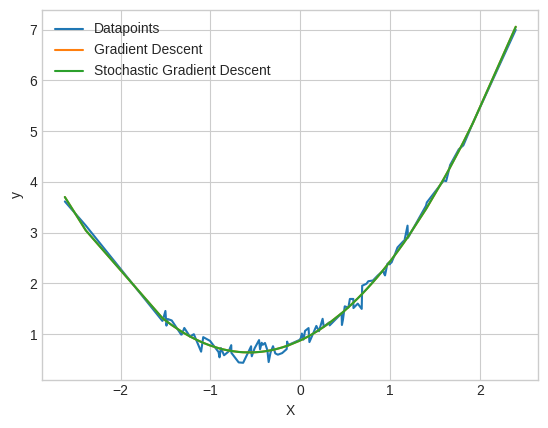

In [9]:
#plotting
sort_inds = np.argsort(x)
plt.plot(x[sort_inds], y[sort_inds], label='Datapoints')
plt.plot(x[sort_inds], ygd[sort_inds], label='Gradient Descent')
plt.plot(x[sort_inds], ysgd[sort_inds], label='Stochastic Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()